In [1]:
import pandas as pd
import re
import string
import matplotlib
import nltk
#from nltk import stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
  
# importing all necessery modules for word clouds
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/karinahou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
yelp_reviews = pd.read_csv("../Data/yelp_review.csv")
yelp_business = pd.read_csv("../Data/yelp_business.csv")

In [3]:
yelp_reviews.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [4]:
yelp_business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [5]:
#write a loop tp isolate the ratings and append it to a new dataframe

In [6]:
#Selecting 40k of each review number and appending it to a new dataframe of 200k rows

yelp_reviews_equal = pd.DataFrame()

for x in range(6):
    star_reviews = yelp_reviews.loc[(yelp_reviews['stars']== x)]
    star_reviews = star_reviews.head(40000)
    yelp_reviews_equal = yelp_reviews_equal.append(star_reviews)
    

In [7]:
print(len(yelp_reviews_equal))

200000


In [8]:
#read review text reviews with only 5 star ratings for word cloud

five_star_reviews = yelp_reviews.loc[(yelp_reviews['stars']==5)]
five_star_reviews = five_star_reviews.head(40000)

print(five_star_reviews.head())

                review_id                 user_id             business_id  \
0  vkVSCC7xljjrAI4UGfnKEQ  bv2nCi5Qv5vroFiqKGopiw  AEx2SYEUJmTxVVB18LlCwA   
1  n6QzIUObkYshz4dz2QRJTw  bv2nCi5Qv5vroFiqKGopiw  VR6GpWIda3SfvPC-lg9H3w   
2  MV3CcKScW05u5LVfF6ok0g  bv2nCi5Qv5vroFiqKGopiw  CKC0-MOWMqoeWf6s-szl8g   
5  HRPm3vEZ_F-33TYVT7Pebw  _4iMDXbXZ1p1ONG297YEAQ  8QWPlVQ6D-OExqXoaD2Z1g   
9  WF_QTN3p-thD74hqpp2j-Q  u0LXt3Uea_GidxRW1xcsfg  fDF_o2JPU8BR1Gya--jRIA   

   stars        date                                               text  \
0      5  2016-05-28  Super simple place but amazing nonetheless. It...   
1      5  2016-05-28  Small unassuming place that changes their menu...   
2      5  2016-05-28  Lester's is located in a beautiful neighborhoo...   
5      5  2014-09-24  Cycle Pub Las Vegas was a blast! Got a groupon...   
9      5  2016-04-06  Love this place!\n\nPeggy is great with dogs a...   

   useful  funny  cool  
0       0      0     0  
1       0      0     0  
2       0  

In [9]:
#read review text reviews with only 1 star ratings for word cloud

one_star_reviews = yelp_reviews.loc[(yelp_reviews['stars']==1)]
one_star_reviews = one_star_reviews.head(40000)
print(one_star_reviews.head())
print("1 Star Review Size", len(one_star_reviews))

                 review_id                 user_id             business_id  \
12  x5oV6wm9_Pb1QQ6jkjDjwQ  u0LXt3Uea_GidxRW1xcsfg  13nKUHH-uEUXVZylgxchPA   
16  FKu4iU62EmWT6GZXPJ2sgA  u0LXt3Uea_GidxRW1xcsfg  fdnNZMk1NP7ZhL-YMidMpw   
19  WYDFJOBOl7cycd7gN-c_xA  u0LXt3Uea_GidxRW1xcsfg  zgQHtqX0gqMw1nlBZl2VnQ   
23  ypjtMQLKdAwKGRS-KU7oxA  u0LXt3Uea_GidxRW1xcsfg  hjk3ox7w1akbEuOgTJ03Bw   
31  z9e32TaBomM5uY7fHYqYKg  u0LXt3Uea_GidxRW1xcsfg  I8rveLd-dl81u6c8YqAxmw   

    stars        date                                               text  \
12      1  2011-02-16  I thought Tidy's Flowers had a great reputatio...   
16      1  2012-10-23  I too have been trying to book an appt to use ...   
19      1  2012-10-30  really excited to hear of this restaurant comi...   
23      1  2012-05-10  Food is very bland - not authentic at all.\n\n...   
31      1  2012-05-11  If you have not yet tried Wasabi - don't bothe...   

    useful  funny  cool  
12       9      0     1  
16       0      0     

In [10]:
# Python program to generate WordCloud 

#word cloud for 10k of 5 star reviews
'''  
#yelp_reviews_test = pd.read_csv("../Data/yelp_review.csv", nrows = 10000) 
wc_five_star_reviews = five_star_reviews.head(10000)
                                                                             
comment_words = ' '
stopwords = set(STOPWORDS) 
# iterate through the csv file 
for val in wc_five_star_reviews.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10,
                max_words = 100).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()
'''

'  \n#yelp_reviews_test = pd.read_csv("../Data/yelp_review.csv", nrows = 10000) \nwc_five_star_reviews = five_star_reviews.head(10000)\n                                                                             \ncomment_words = \' \'\nstopwords = set(STOPWORDS) \n# iterate through the csv file \nfor val in wc_five_star_reviews.text: \n      \n    # typecaste each val to string \n    val = str(val) \n  \n    # split the value \n    tokens = val.split() \n      \n    # Converts each token into lowercase \n    for i in range(len(tokens)): \n        tokens[i] = tokens[i].lower() \n          \n    for words in tokens: \n        comment_words = comment_words + words + \' \'\n  \n  \nwordcloud = WordCloud(width = 800, height = 800, \n                background_color =\'white\', \n                stopwords = stopwords, \n                min_font_size = 10,\n                max_words = 100).generate(comment_words) \n  \n# plot the WordCloud image                        \nplt.figure(figsize =

In [11]:
# Python program to generate WordCloud 

#word cloud for 10k of 1 star reviews
''' 
wc_one_star_reviews = one_star_reviews.head(10000)
                                                                             
comment_words = ' '
stopwords = set(STOPWORDS) 
# iterate through the csv file 
for val in wc_one_star_reviews.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10,
                max_words = 100).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()
'''


' \nwc_one_star_reviews = one_star_reviews.head(10000)\n                                                                             \ncomment_words = \' \'\nstopwords = set(STOPWORDS) \n# iterate through the csv file \nfor val in wc_one_star_reviews.text: \n      \n    # typecaste each val to string \n    val = str(val) \n  \n    # split the value \n    tokens = val.split() \n      \n    # Converts each token into lowercase \n    for i in range(len(tokens)): \n        tokens[i] = tokens[i].lower() \n          \n    for words in tokens: \n        comment_words = comment_words + words + \' \'\n  \n  \nwordcloud = WordCloud(width = 800, height = 800, \n                background_color =\'white\', \n                stopwords = stopwords, \n                min_font_size = 10,\n                max_words = 100).generate(comment_words) \n  \n# plot the WordCloud image                        \nplt.figure(figsize = (8, 8), facecolor = None) \nplt.imshow(wordcloud) \nplt.axis("off") \nplt.tight_

In [12]:
yelp_reviews_equal.text.head()

12    I thought Tidy's Flowers had a great reputatio...
16    I too have been trying to book an appt to use ...
19    really excited to hear of this restaurant comi...
23    Food is very bland - not authentic at all.\n\n...
31    If you have not yet tried Wasabi - don't bothe...
Name: text, dtype: object

In [13]:
#Removing punctuation from the reviews
#****use the same dataframe, take things out of memory**
yelp_reviews_equal['cleaned_text'] = yelp_reviews_equal['text'].str.replace('[^\w\s]','')

In [14]:
#making the review text all lowercase
yelp_reviews_equal['cleaned_text'] = yelp_reviews_equal['cleaned_text'].str.lower()

In [15]:
#removing all numbers from reviews
yelp_reviews_equal['cleaned_text'] = yelp_reviews_equal['cleaned_text'].str.replace(r'\d+', '')

In [16]:
#removing _ (underscores) from the review text
yelp_reviews_equal['cleaned_text'] = yelp_reviews_equal['cleaned_text'].str.replace('_', '')

In [17]:
#splitting each word into a list
yelp_reviews_equal['cleaned_text'] = yelp_reviews_equal['cleaned_text'].str.split()

In [18]:
yelp_reviews_equal['cleaned_text'].head()

12    [i, thought, tidys, flowers, had, a, great, re...
16    [i, too, have, been, trying, to, book, an, app...
19    [really, excited, to, hear, of, this, restaura...
23    [food, is, very, bland, not, authentic, at, al...
31    [if, you, have, not, yet, tried, wasabi, dont,...
Name: cleaned_text, dtype: object

In [19]:
#removing all stop words (and, but, then, etc)
stop = stopwords.words('english')
yelp_reviews_equal['cleaned_text'] = yelp_reviews_equal['cleaned_text'].apply(lambda x: [item for item in x if item not in stop])

In [20]:
#stemmer = SnowballStemmer("english")
#yelp_reviews['cleaned_text'] = stop_words.apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

In [21]:
#lemmatize the text and take it out of the list
lemmatizer = WordNetLemmatizer()
yelp_reviews_equal['cleaned_text'] = yelp_reviews_equal['cleaned_text'].apply(lambda x:' '.join([lemmatizer.lemmatize(y) for y in x])) # Lemmatize every word.


In [22]:
yelp_reviews_equal['cleaned_text'].head()

12    thought tidy flower great reputation florist g...
16    trying book appt use voucher month countless p...
19    really excited hear restaurant coming toronto ...
23    food bland authentic meant cater customer neve...
31    yet tried wasabi dont bother expensive food di...
Name: cleaned_text, dtype: object

In [23]:
yelp_reviews_equal.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,cleaned_text
12,x5oV6wm9_Pb1QQ6jkjDjwQ,u0LXt3Uea_GidxRW1xcsfg,13nKUHH-uEUXVZylgxchPA,1,2011-02-16,I thought Tidy's Flowers had a great reputatio...,9,0,1,thought tidy flower great reputation florist g...
16,FKu4iU62EmWT6GZXPJ2sgA,u0LXt3Uea_GidxRW1xcsfg,fdnNZMk1NP7ZhL-YMidMpw,1,2012-10-23,I too have been trying to book an appt to use ...,0,0,0,trying book appt use voucher month countless p...
19,WYDFJOBOl7cycd7gN-c_xA,u0LXt3Uea_GidxRW1xcsfg,zgQHtqX0gqMw1nlBZl2VnQ,1,2012-10-30,really excited to hear of this restaurant comi...,9,2,1,really excited hear restaurant coming toronto ...
23,ypjtMQLKdAwKGRS-KU7oxA,u0LXt3Uea_GidxRW1xcsfg,hjk3ox7w1akbEuOgTJ03Bw,1,2012-05-10,Food is very bland - not authentic at all.\n\n...,4,2,0,food bland authentic meant cater customer neve...
31,z9e32TaBomM5uY7fHYqYKg,u0LXt3Uea_GidxRW1xcsfg,I8rveLd-dl81u6c8YqAxmw,1,2012-05-11,If you have not yet tried Wasabi - don't bothe...,3,0,0,yet tried wasabi dont bother expensive food di...


In [24]:
#checking for null values
yelp_reviews_equal.isnull().sum()

review_id       0
user_id         0
business_id     0
stars           0
date            0
text            0
useful          0
funny           0
cool            0
cleaned_text    0
dtype: int64

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
#making a new dataframe with less rows for the sake of machine learning

yelp_reviews_ml = pd.DataFrame()

for x in range(6):
    ml_reviews = yelp_reviews_equal.loc[(yelp_reviews_equal['stars']== x)]
    ml_reviews = ml_reviews.head(8000)
    yelp_reviews_ml = yelp_reviews_ml.append(ml_reviews)


In [27]:
print(len(yelp_reviews_ml))

40000


In [28]:
#text_data = yelp_reviews_ml['cleaned_text']
text_data = yelp_reviews_equal['cleaned_text']

In [29]:
#use tokenizer as an argument, get feautre names, n-gram range =  1

#Use count vect
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(text_data)
print(count_vect.get_feature_names()[:10])
print(X_train_counts.shape)



['aa', 'aaa', 'aaaaa', 'aaaaaaaaaaaaahhhhhhh', 'aaaaaaaaaaand', 'aaaaaaaaand', 'aaaaaaaannnnd', 'aaaaaaahhhhhh', 'aaaaaaall', 'aaaaaaand']
(200000, 179642)


In [30]:
vec = TfidfVectorizer(stop_words="english")

#vec.fit(yelp_reviews.cleaned_text)
vec.fit(yelp_reviews_equal.cleaned_text.values.astype('U'))
features = vec.transform(yelp_reviews_equal.cleaned_text)

print(features[:1])

  (0, 175443)	0.11314975513813419
  (0, 171108)	0.042019394632723105
  (0, 166709)	0.1269287108242341
  (0, 166398)	0.401122238258285
  (0, 163879)	0.09009799926959466
  (0, 157729)	0.22141184527945038
  (0, 157233)	0.05125915925632052
  (0, 152923)	0.043660741892785175
  (0, 151874)	0.07356286020695979
  (0, 148607)	0.1144442462894998
  (0, 145917)	0.08363099777705771
  (0, 143081)	0.04713827831253366
  (0, 141520)	0.07363010971996788
  (0, 140631)	0.13718243895572493
  (0, 140407)	0.06213518971378355
  (0, 133277)	0.0431354466707839
  (0, 131830)	0.37244374484610826
  (0, 128704)	0.1343090840663717
  (0, 128549)	0.09547402898999534
  (0, 126219)	0.062233923336311156
  (0, 125860)	0.03433340456276769
  (0, 117637)	0.07409154947922272
  (0, 117602)	0.026254280114515638
  (0, 110404)	0.12565758060211515
  (0, 109986)	0.11738736588006041
  :	:
  (0, 68878)	0.06785180003130808
  (0, 68874)	0.07396525333759649
  (0, 68644)	0.08980624572821076
  (0, 67087)	0.05863729192359485
  (0, 66072)	0

In [31]:
print(features.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [32]:
print(yelp_reviews_ml.describe())

              stars        useful        funny          cool
count  40000.000000  40000.000000  40000.00000  40000.000000
mean       3.000000      1.661900      0.64155      0.628100
std        1.414231      8.091003      3.02449      2.490842
min        1.000000      0.000000      0.00000      0.000000
25%        2.000000      0.000000      0.00000      0.000000
50%        3.000000      1.000000      0.00000      0.000000
75%        4.000000      2.000000      1.00000      1.000000
max        5.000000   1456.000000    447.00000    245.000000


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(yelp_reviews_ml.cleaned_text)
print(X_tfidf.shape)


(40000, 69319)


In [34]:
print(tfidf_vect.get_feature_names()[:10])

['aa', 'aaa', 'aaaaa', 'aaaaaaaaaaaaahhhhhhh', 'aaaaaaall', 'aaaaahhhmaizeing', 'aaaaand', 'aaaahhhh', 'aaaand', 'aaahhh']


In [35]:
#test train split, use train in validation, fit model.
#best practice: apply best parameters on the 20% of validation test and compare accuracy
#applied before fitting (**train_test_split**)

In [36]:
X = X_train_counts
y = yelp_reviews_equal.stars

In [37]:
from sklearn import model_selection

In [38]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80,test_size=0.20, random_state=42)

In [89]:
#Random Forest for the test model

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
param = {'n_estimators': [1, 50 ,100, 150, 200],
        'max_depth': [1,10, 30],
        'min_samples_leaf': [100]}
gs = GridSearchCV(rf, param, cv=5, scoring = 'accuracy')
gs_fit = gs.fit(X_train, y_train)


In [90]:
#https://stackoverflow.com/questions/47882126/how-to-print-recall-and-accuracy-along-with-parameters-used-in-a-gridsearch-in-s

In [91]:
gs_fit.cv_results_

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py

{'mean_fit_time': array([  0.64,   2.96,   5.13,   7.54,  10.18,   0.72,  21.86,  41.19,
         60.98,  77.12,   1.14,  42.03,  85.39, 147.37, 181.59]),
 'std_fit_time': array([0.3 , 0.31, 0.05, 0.14, 0.47, 0.03, 3.4 , 1.66, 2.35, 0.32, 0.09,
        0.77, 2.44, 9.02, 2.51]),
 'mean_score_time': array([0.09, 0.44, 0.78, 1.27, 1.52, 0.08, 0.51, 0.94, 1.27, 1.59, 0.08,
        0.57, 1.07, 1.81, 2.43]),
 'std_score_time': array([0.01, 0.02, 0.02, 0.29, 0.07, 0.  , 0.05, 0.14, 0.09, 0.04, 0.  ,
        0.03, 0.04, 0.1 , 0.18]),
 'param_max_depth': masked_array(data=[1, 1, 1, 1, 1, 10, 10, 10, 10, 10, 30, 30, 30, 30, 30],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
                    100, 100, 100, 100],
              mask=[False, False,

In [92]:
best_params = gs_fit.best_params_
print(best_params)

{'max_depth': 30, 'min_samples_leaf': 100, 'n_estimators': 200}


In [93]:
print(gs_fit.best_score_)

0.49198125


In [94]:
y_pred = gs_fit.predict(X_test)

In [95]:
print(y_pred)

[1 2 5 ... 3 5 1]


In [96]:
#gs_fit accuracy vs test_predict
#sikt learn accuracy & confusion matrix

from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test, y_pred)

0.4968

In [97]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[6084,  742,  202,   74,  882],
       [2740, 2082, 1586,  406, 1195],
       [1070,  890, 3125, 1330, 1517],
       [ 453,  238, 1473, 2588, 3247],
       [ 549,   73,  327, 1134, 5993]])

In [98]:
import numpy as np

In [99]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

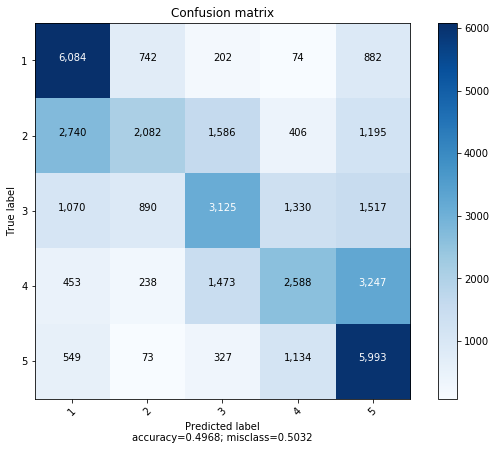

In [100]:
plot_confusion_matrix(cm, normalize = False, target_names = [1,2,3,4,5])

In [45]:
#accuracy
#false positives and negatives (classification - confusion matrix) * maximize the diagonal
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
#google colabs (google cloud), run this on kaggle?
#https://colab.research.google.com/notebooks/intro.ipynb
#put a log on the grid search, to see how long it computes/what takes so long
#try one or two

#clf.grid_scores_
#https://stackoverflow.com/questions/22155953/how-to-print-out-an-accuracy-score-for-each-combination-within-gridsearch

#let things run for an hour

#reduce the columns/rows for the machine learning part 20k rows

In [ ]:
#classification matrix - false positive and negatives
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html